# Úvod do DEAP (Distributed Evolutionary Algorithms in Python)

instalace v terminálu pomocí 

conda install -c conda-forge deap 

In [70]:
import numpy as np

import random

from deap import base, creator, tools, algorithms



## Vytváření nových typů
---

### Fitness
params: název, objekt fitness, -1.0 minimalizace / 1.0 maximalizace

In [71]:
creator.create("FitnessMax", base.Fitness, weights=(-1.0,))

2:15:50

### Individua
params: název, třída datové struktury, fitness dle existující zaregistrované

budeme pracovat s listy (jde i numpy pole ale pozor na views!)

existuje celá řada typů: permutace, stromy, atd.

In [72]:
creator.create("Individual", list, fitness=creator.FitnessMax)

C:\Users\amart\Desktop\SegregationModel\SegModelEnv\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [73]:
toolbox = base.Toolbox()

toolbox.register("attr_float", random.random)
toolbox.register("individual", tools.initRepeat, creator.Individual,
                 toolbox.attr_float, n=10)
#toolbox.register("individual", initind, IND_LEN)  # název, funkce, poporade parametry krmici funkci

In [74]:
ind1 = toolbox.individual()
print(ind1)
ind1[1]


[0.9023773947332757, 0.2235042051678422, 0.5444095637455512, 0.8014784166480103, 0.9530509255656759, 0.360308975638834, 0.5701670081684096, 0.11209612338823893, 0.3846840351243612, 0.21768556504817427]


0.2235042051678422

In [75]:
ind1.fitness.values
ind1.fitness.valid



False

### Populace

In [76]:
toolbox.register("population", tools.initRepeat, list, toolbox.individual) 
# init repeat opakuje dle parametru za ni, tedy dela list individui dle zakladni inicializace individua


In [77]:
pop = toolbox.population(n=2)
print(pop)

[[0.18271594409820813, 0.7527386321151546, 0.7078613338952585, 0.11587956179968906, 0.1383647179634162, 0.24801295161385983, 0.7927507262544633, 0.07558108931800811, 0.7085920190689995, 0.28289663161925904], [0.915214614067264, 0.31744958665201395, 0.024948619741195, 0.5377212977473681, 0.9625694120992927, 0.5676902072541801, 0.5192610363106185, 0.6243885822292012, 0.9382855619314474, 0.20641944950106061]]


## Fitness
---
Tuto funkci si musíme napsat sami !!!

In [78]:
def three_lake_not_extreme_terrain(arr):
    lakes = 0
    prev_underwater = None
    underwater = False
    extreme_penalty = 0
    prev = arr[0]
    for point in arr:
        prev_underwater = underwater
        underwater = True if point < 0.5 else False
        if underwater and not prev_underwater:
            lakes += 1
        # point between 0.3 and 0.7
        if abs(0.5 - point) > 0.4:
            extreme_penalty += 0.1
        elif abs(0.5 - point) > 0.2:
            extreme_penalty += 0.05
    return (abs(3 - lakes) + extreme_penalty,)

In [79]:
toolbox.register("evaluate", three_lake_not_extreme_terrain)

## Operátory
---

sada operátorů lze nalézt v [dokumentaci](https://deap.readthedocs.io/en/master/api/tools.html#module-deap.tools)

In [80]:
toolbox.register("mate", tools.cxOnePoint)
toolbox.register("mutate", tools.mutUniformInt, low=0, up=1, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

## Jednoduchý algoritmus
---

In [87]:
# hlavní parametry vystrčené kvůli experimentování

NGEN = 200            # počet generací
CXPB = 0.7           # pravděpodobnost crossoveru na páru
MUTPB = 0.2         # pravděpodobnost mutace jedince

finalpop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=CXPB, mutpb=MUTPB, ngen=NGEN)


gen	nevals
0  	0     
1  	5     
2  	9     
3  	6     
4  	9     
5  	10    
6  	8     
7  	6     
8  	6     
9  	8     
10 	6     
11 	9     
12 	6     
13 	5     
14 	10    
15 	8     
16 	7     
17 	7     
18 	10    
19 	6     
20 	7     
21 	9     
22 	5     
23 	9     
24 	9     
25 	9     
26 	10    
27 	10    
28 	8     
29 	7     
30 	6     
31 	6     
32 	8     
33 	8     
34 	8     
35 	6     
36 	4     
37 	7     
38 	7     
39 	3     
40 	7     
41 	9     
42 	8     
43 	7     
44 	9     
45 	10    
46 	8     
47 	6     
48 	8     
49 	6     
50 	8     
51 	10    
52 	4     
53 	6     
54 	9     
55 	8     
56 	8     
57 	8     
58 	8     
59 	9     
60 	4     
61 	7     
62 	7     
63 	7     
64 	9     
65 	9     
66 	7     
67 	4     
68 	8     
69 	8     
70 	8     
71 	10    
72 	7     
73 	8     
74 	10    
75 	6     
76 	4     
77 	9     
78 	6     
79 	9     
80 	10    
81 	8     
82 	5     
83 	6     
84 	8     
85 	10    
86 	8     
87 	6     
88 	10    
89 	6     

## Statistika
---

In [88]:
import numpy as np


s = tools.Statistics(key=lambda ind: ind.fitness.values)
s.register("mean", np.mean)
s.register("max", np.max)


hof = tools.HallOfFame(1)  # pamatuje si 1 nejlepšího jedince za historii evoluce (i když zanikne)

pop = toolbox.population(n=10)


finalpop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=CXPB, mutpb=MUTPB, ngen=NGEN, stats=s, halloffame=hof)

gen	nevals	mean	max
0  	10    	1.15	2.4
1  	8     	0.635	1.35
2  	8     	0.68 	1.45
3  	10    	0.45 	1.4 
4  	8     	0.325	0.4 
5  	5     	0.265	0.35
6  	8     	0.23 	0.3 
7  	8     	0.235	0.35
8  	6     	0.215	0.25
9  	10    	0.225	0.35
10 	10    	0.2  	0.2 
11 	8     	0.2  	0.2 
12 	7     	0.2  	0.2 
13 	8     	0.315	1.25
14 	5     	0.22 	0.3 
15 	10    	0.32 	1.4 
16 	9     	0.205	0.25
17 	8     	0.21 	0.3 
18 	10    	0.21 	0.3 
19 	10    	0.21 	0.3 
20 	8     	0.315	1.35
21 	10    	0.2  	0.2 
22 	9     	0.2  	0.2 
23 	8     	0.34 	1.35
24 	7     	0.21 	0.3 
25 	6     	0.22 	0.3 
26 	10    	0.22 	0.4 
27 	10    	0.305	1.25
28 	8     	0.2  	0.2 
29 	8     	0.2  	0.2 
30 	7     	0.205	0.25
31 	8     	0.2  	0.2 
32 	10    	0.2  	0.2 
33 	6     	0.21 	0.3 
34 	7     	0.21 	0.3 
35 	9     	0.21 	0.3 
36 	8     	0.21 	0.3 
37 	6     	0.2  	0.2 
38 	7     	0.2  	0.2 
39 	3     	0.2  	0.2 
40 	10    	0.2  	0.2 
41 	5     	0.215	0.3 
42 	3     	0.2  	0.2 
43 	8     	0.21 	0.3 
44 	8     	0.3

In [89]:
mean, maximum = logbook.select("mean", "max")


print(hof)

[[0.41607021388704024, 0.33080615319083106, 0.47297114876392377, 0.6492746164608879, 0.9384969581177135, 0.4708781117078764, 0.4735612711931, 0.5776755602262262, 0.7543664195708623, 0.21200815385326355]]


In [90]:
def display_terrain(arr):    
    # array of x values => x-axis
    x = np.arange(0, len(arr))
    
    # Function y=0.5 => water level
    y_half = np.full(len(arr), 0.5)    

    # filling water level
    plt.fill_between(x, y_half, 0, color='blue')

    # filling the surface
    plt.fill_between(x, arr, 0, color='orange')
    
    # plotting the line for values from array
    plt.plot(x, arr, color='black')
    
    # Set the y-axis limits to ensure the horizontal line is visible
    plt.ylim(0, 1)
    
    # Add title
    plt.title('Terrain')
    
    # Show the plot
    plt.show()

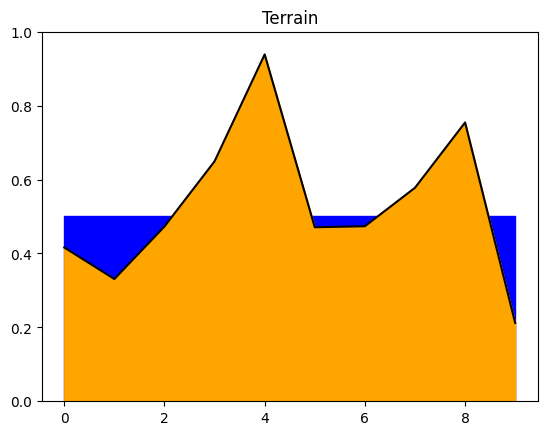

In [91]:
display_terrain(hof[0])

## Kreslení statistiky
---

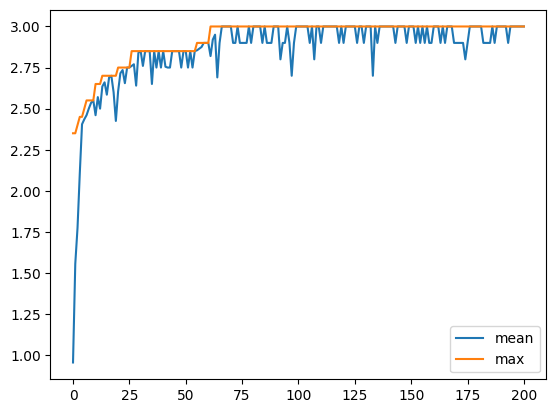

In [65]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.plot(range(NGEN+1), mean, label="mean")     # 0.tá generace zvlášť
ax.plot(range(NGEN+1), maximum, label="max")

ax.legend()

## Aplikace na barvení grafu
---

### Načtení dat

In [19]:
import numpy as np
import networkx as nx



# funkce pro nacitani grafu z Dimacs formatu
def readdimacs(filename):

    file = open(filename, 'r')
    lines = file.readlines()
    
    Gd = nx.Graph()

    for line in lines:
        if line[0] == "e":
            vs = [int(s) for s in line.split() if s.isdigit()]
            Gd.add_edge(vs[0]-1, vs[1]-1)   # dimacs cisluje vrcholy od 1
    return Gd

Gd = nx.Graph()
Gd = readdimacs('dsjc125.1.txt') 




### Definice GA

In [24]:

COLNUM = 5 # počet barev

N = Gd.number_of_nodes()

creator.create("FitnessMax", base.Fitness, weights=(-1.0,))  # minimalizujeme počet kolizí

creator.create("Individual", list, fitness=creator.FitnessMax)


toolbox = base.Toolbox()

toolbox.register("attr_float", random.randint, 0, COLNUM)
toolbox.register("individual", tools.initRepeat, creator.Individual,
                 toolbox.attr_float, n=N)


toolbox.register("population", tools.initRepeat, list, toolbox.individual) 


# vrací celkový počet kolizí
def evaluate(individual):
    
    collisions = 0
    
    for i in range(N-1):
        for j in range(i, N):
            if Gd.has_edge(i, j):
                if individual[i] == individual[j]:
                    collisions += 1
    return collisions, # !!!! vracíme n-tici, proto ta čárka
   

toolbox.register("evaluate", evaluate)


toolbox.register("mate", tools.cxOnePoint)
toolbox.register("mutate", tools.mutUniformInt, low=0, up=COLNUM, indpb=0.01)
toolbox.register("select", tools.selTournament, tournsize=2)



NGEN = 2000# počet generací
CXPB = 0.5           # pravděpodobnost crossoveru na páru
MUTPB = 0.7         # pravděpodobnost mutace



s = tools.Statistics(key=lambda ind: ind.fitness.values)
s.register("mean", np.mean)
s.register("min", np.min)

pop = toolbox.population(n=100)


finalpop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=CXPB, mutpb=MUTPB, ngen=NGEN, stats=s)

gen	nevals	mean  	min
0  	100   	121.76	98 
1  	77    	117.05	101
2  	80    	112.99	98 
3  	90    	110.27	94 
4  	87    	106.63	94 
5  	86    	105.01	88 
6  	82    	103.63	90 
7  	80    	102.5 	91 
8  	85    	101.76	89 
9  	89    	99.86 	89 
10 	85    	99.5  	89 
11 	85    	96.95 	85 
12 	87    	95.99 	82 
13 	84    	94.62 	83 
14 	76    	93.96 	79 
15 	81    	91.71 	81 
16 	82    	91.22 	76 
17 	84    	89.25 	76 
18 	84    	87.42 	77 
19 	84    	86.08 	75 
20 	91    	84.84 	76 
21 	85    	83.34 	71 
22 	87    	81.43 	71 
23 	82    	80.26 	71 
24 	83    	79.2  	63 
25 	89    	77.5  	63 
26 	92    	76.61 	64 
27 	86    	74.81 	64 
28 	92    	72.87 	61 
29 	89    	71.3  	61 
30 	86    	69.36 	58 
31 	79    	67.5  	57 
32 	92    	66.44 	59 
33 	88    	65.59 	59 
34 	87    	64.53 	56 
35 	92    	63.89 	56 
36 	84    	62.58 	55 
37 	90    	61.81 	55 
38 	85    	60.22 	53 
39 	87    	59.59 	53 
40 	87    	59    	51 
41 	89    	57.78 	50 
42 	83    	57.04 	49 
43 	91    	56.92 	49 
44 	84    

### Vykreslení fitness

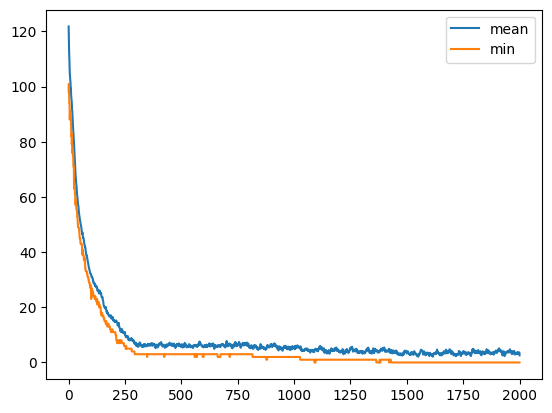

In [25]:
mean, minimum = logbook.select("mean", "min")

fig, ax = plt.subplots()

ax.plot(range(NGEN+1), mean, label="mean")     # 0.tá generace zvlášť
ax.plot(range(NGEN+1), minimum, label="min")
ax.legend()